# Удержание клиентов Фитнес-центра

**Описание задания**:
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

**Цель исследования**:  

Провести анализ и подготовить план действий по удержанию клиентов.
А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: 

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.


**Описание материалов**:
Отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

**Описание данных**:

    Файл  gym_churn.csv:

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.


### Шаг 1. Подготовка данных к анализу.

Импортируем библиотеки, прочитаем файл.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import datetime as dt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import re
from io import BytesIO
import requests
from plotly import graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Настройка отображения 
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 100
sns.set(rc={'figure.figsize':(20, 10)})

In [3]:
#Прочитаем файл
path1 = '/datasets/'
path2 = 'C:/Users/Matebook/Desktop/'
try:
    df = pd.read_csv(path1 + 'gym_churn.csv')
except FileNotFoundError:
    df = pd.read_csv(path2 +'gym_churn.csv')
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пропущенные значения отсутствуют. Приведем названия столбцов к нижнему регистру. Проверим таблицу на наличие дубликатов. 'month_to_end_contract' приведем к целочисленному типу.

In [5]:
#Приведем названия столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)
#Проверка
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [6]:
#Проверка на дубликаты
df.duplicated().sum()

0

In [20]:
#переведем тип данных в целочисленный
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

In [21]:
#Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### Шаг 2. Исследовательский анализ данных (EDA)

#### 2.1 Посмотрим на датасет:изучим средние значения и стандартные отклонения.

In [22]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Стандартные отклонения не очень далеко от средних, не похоже, что есть выбросы.

#### 2.2 Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [11]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


* "gender"  - среднее одинаково, этот признак не влияет на отток/приток.
* "near_location" -  высокий показатель и там и там, это значит большая часть клиентов проживает или работает рядом с фитнес-центром. Больше  отток клиентов среди тех кто работает, живет дальше. 
* "partner" - среди партнеров оттток меньше.
* "promo_friends" - отток среди тех, кто использовал промо-код от знакомого меньше.
* "phone" - среднее одинаково, этот признак не влияет на отток/приток.
* "contract_period" - влияние признака на клиентов высокое.Отток меньше среди тех у кого действующий  абонемента на длительный период (месяц, 6 месяцев, год), что логично.
* "group_visits" -  оказывает сильное положительное влияние. 
* "age" - среднее  почти одинаково, этот признак не влияет на отток/приток.
* "avg_additional_charges_total" - оказывает слабое положительное влияние, клиенты неохотно тратят деньги на доп. услуги. 
* "month_to_end_contract" - сильное положительное влияние на клиентов.
* "lifetime" - очень сильное положительное влияние на клиентов.
* "avg_class_frequency_total" - чем чаще клиент ходит на занятия, тем вероятность отттока меньше.
* "avg_class_frequency_current_month" - положительное влияние на клиентов.(+)

#### 2.3 Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [12]:
#список количественных переменных
list1=['age', 'lifetime', 'contract_period', 'avg_additional_charges_total', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
#список категориальных пременных
list2=['gender','near_location', 'partner', 'promo_friends','phone', 'group_visits']
df1=df
df1=df1.replace({'churn':{0:'остался', 1:'ушел'}})
#sns.pairplot(df1, hue='churn')
#plt.show()

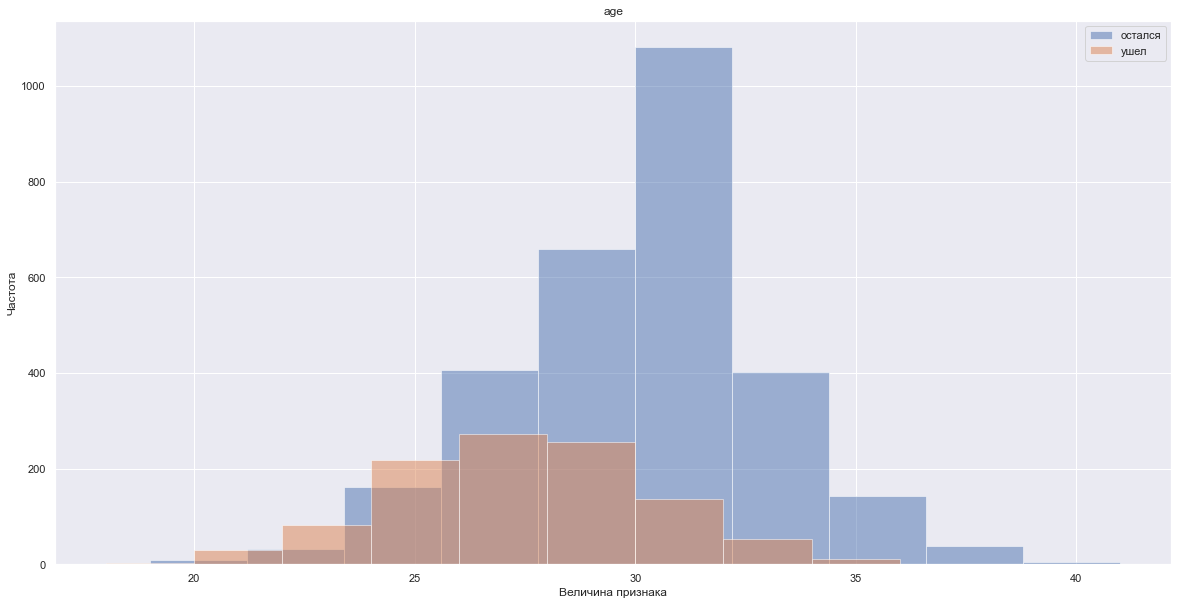

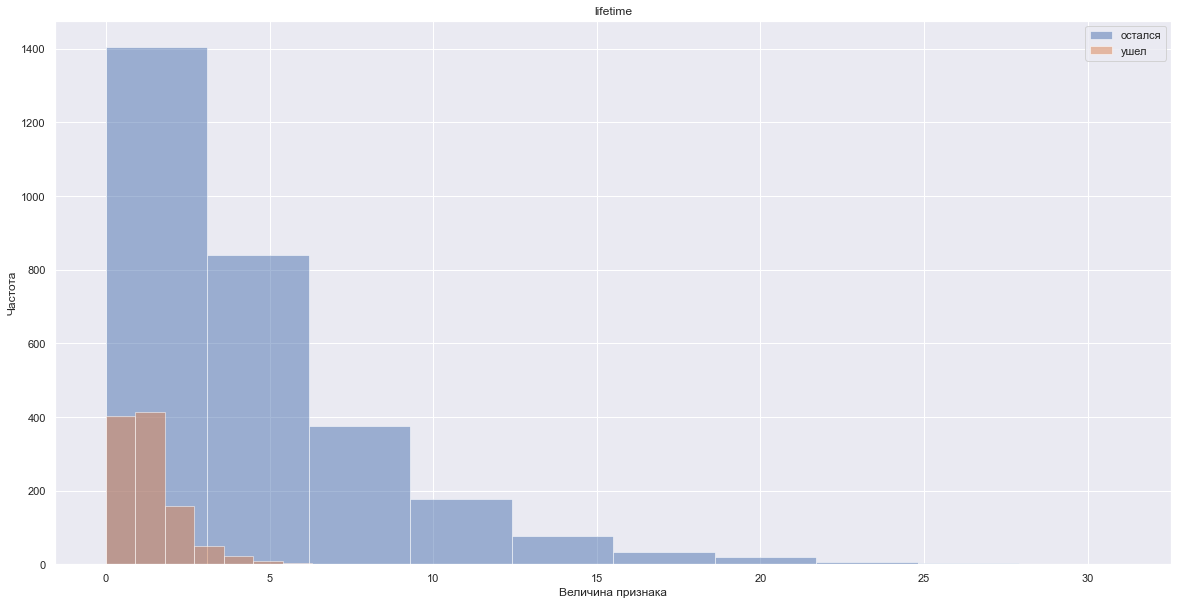

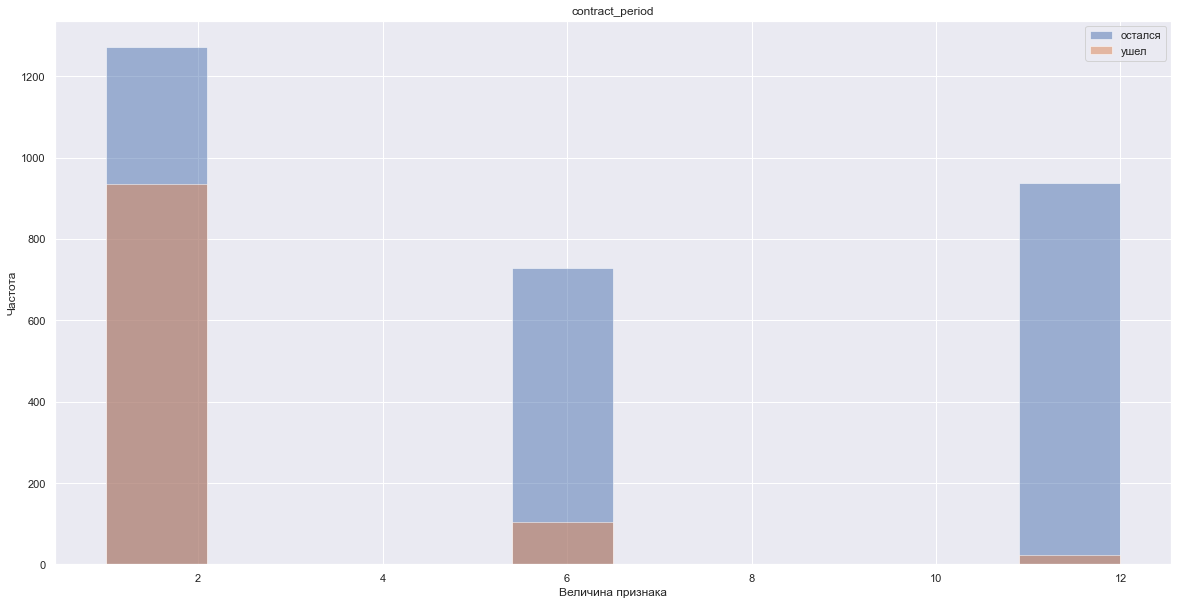

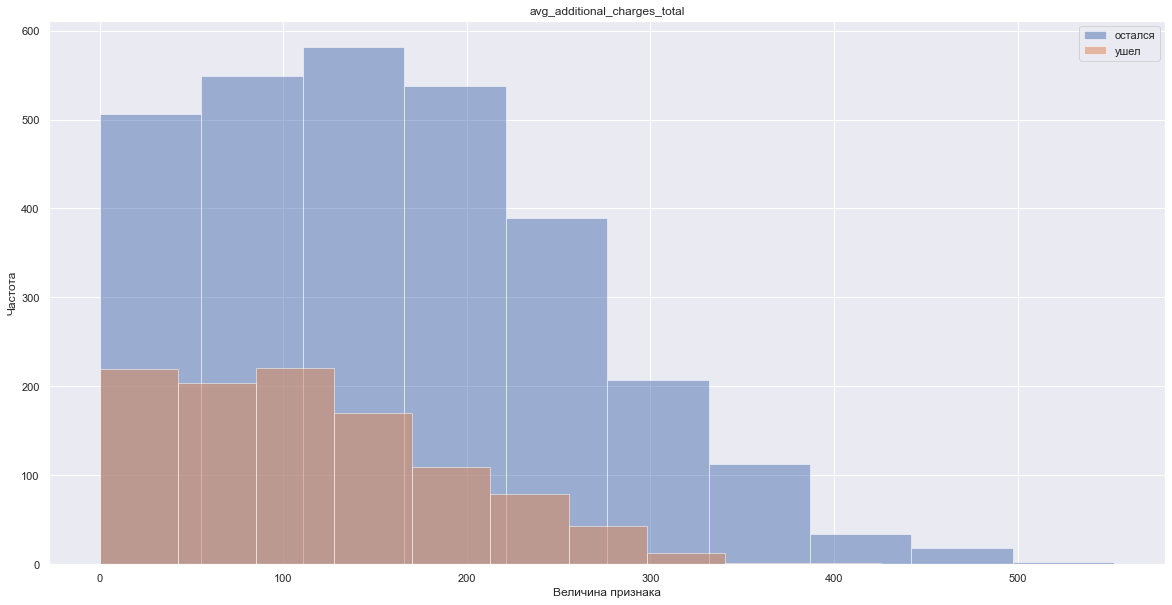

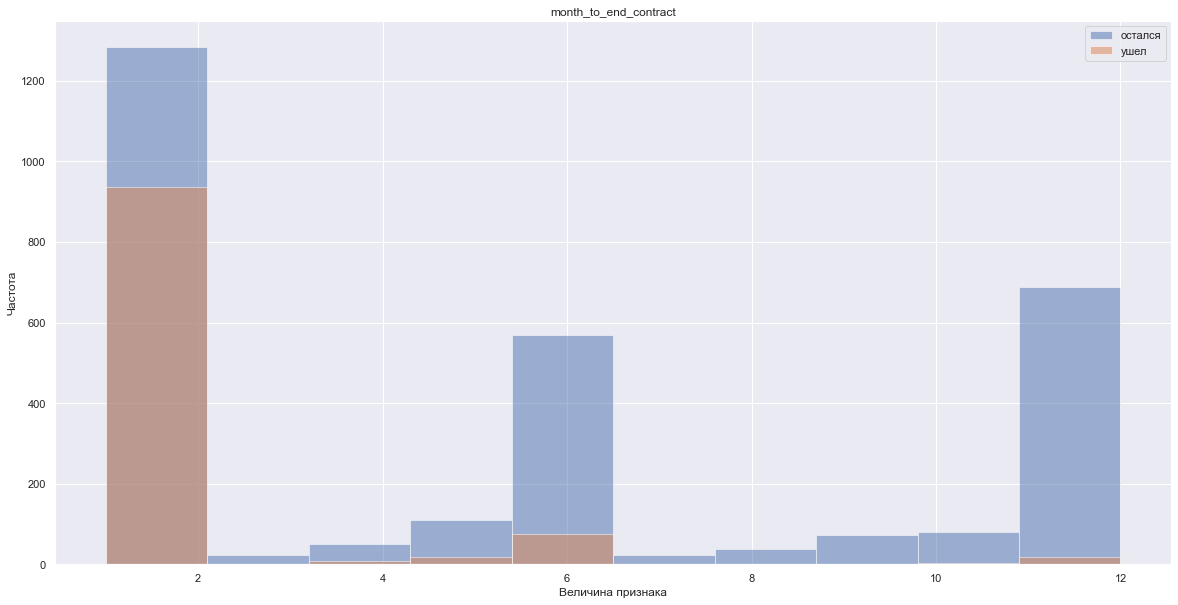

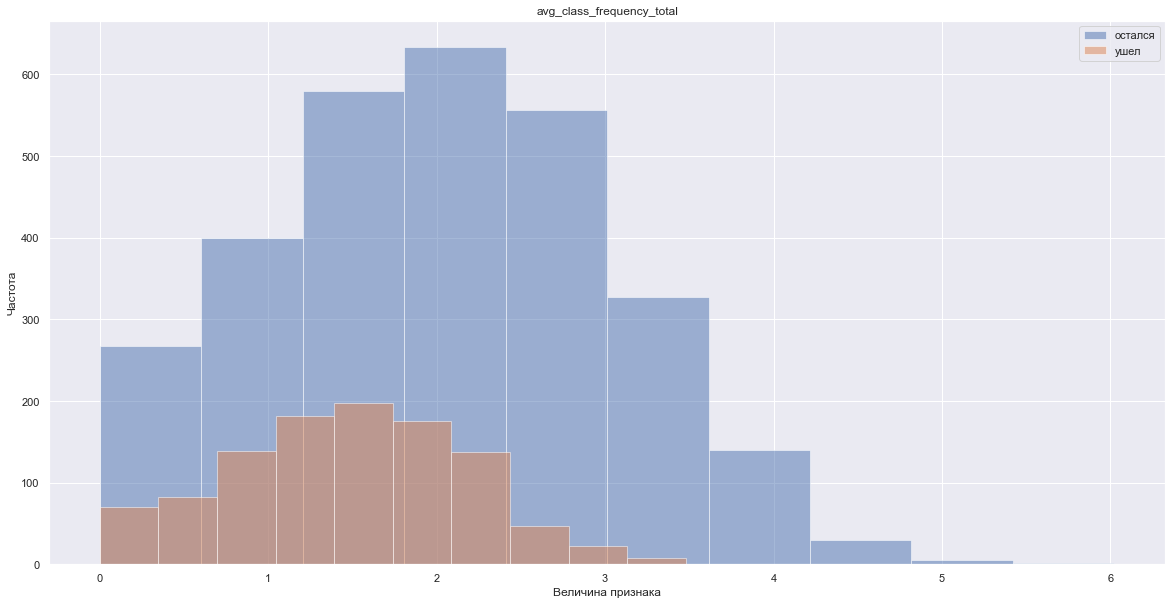

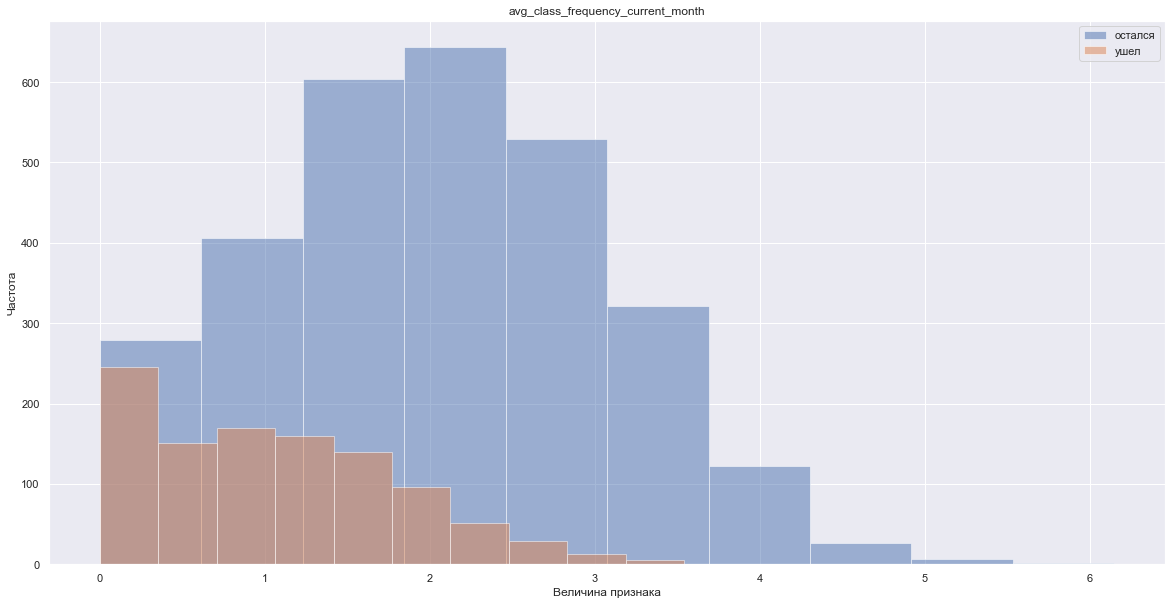

In [13]:
#Гистограммы для количественных переменных
for i in list1:
    df1.groupby('churn')[i].hist(alpha=0.5)
    plt.legend(df1['churn'].unique())
    plt.xlabel("Величина признака")
    plt.ylabel("Частота")
    plt.title(i)
    plt.show()

Гистограммы показывают, что чаще уходят молодые люди (от 20 до 30 лет), время с момента первого обращения которых в фитнес-центр составляет 1-2 месяца, с абонементом на 1 месяц. 

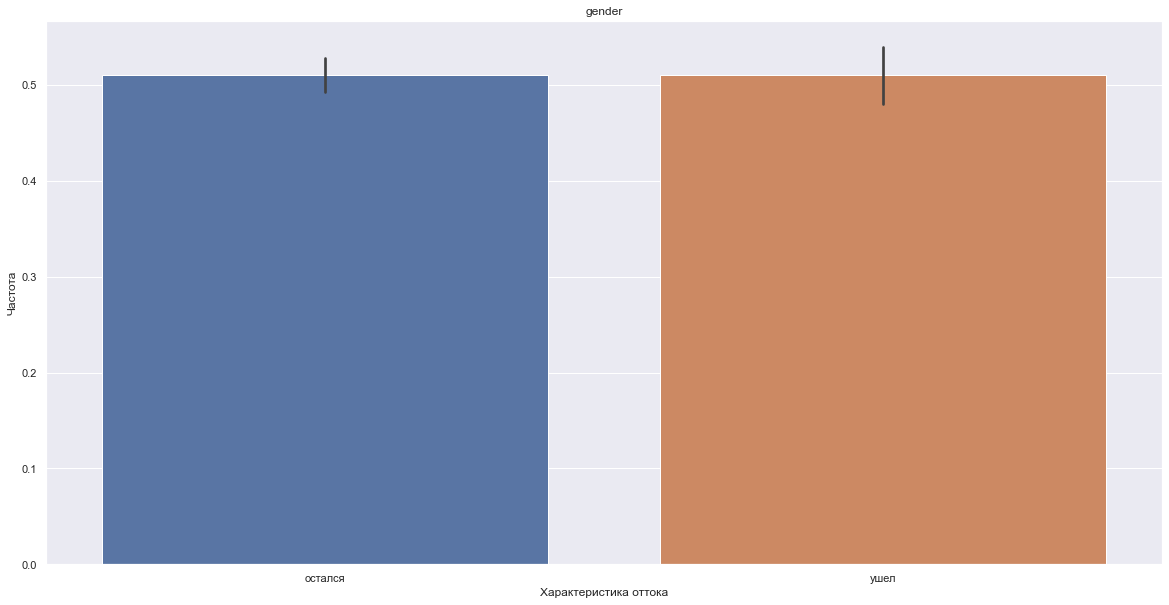

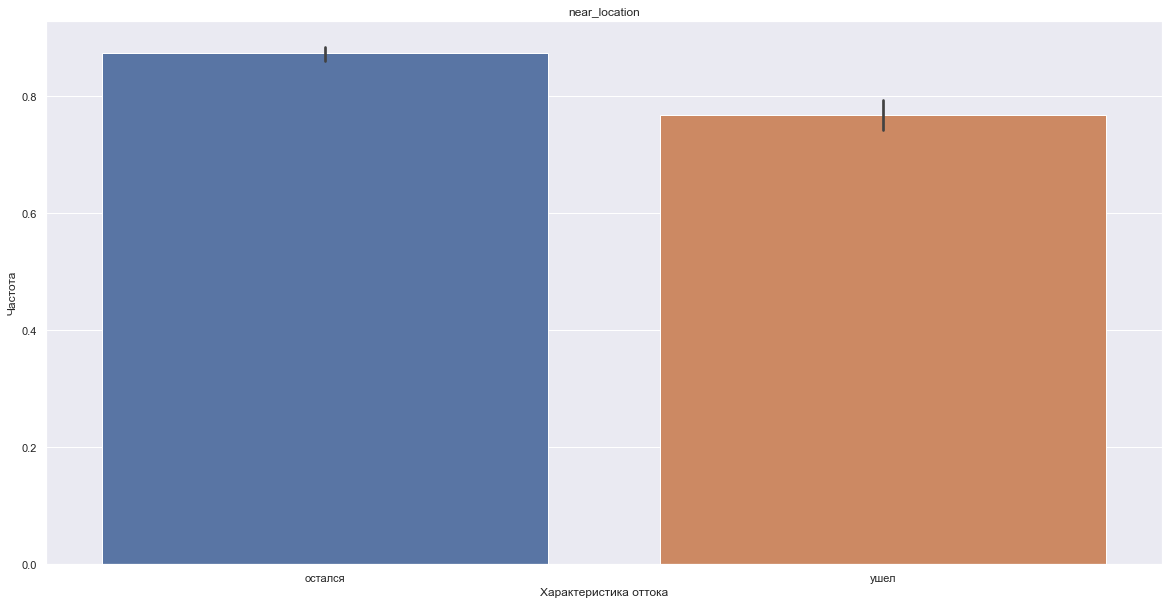

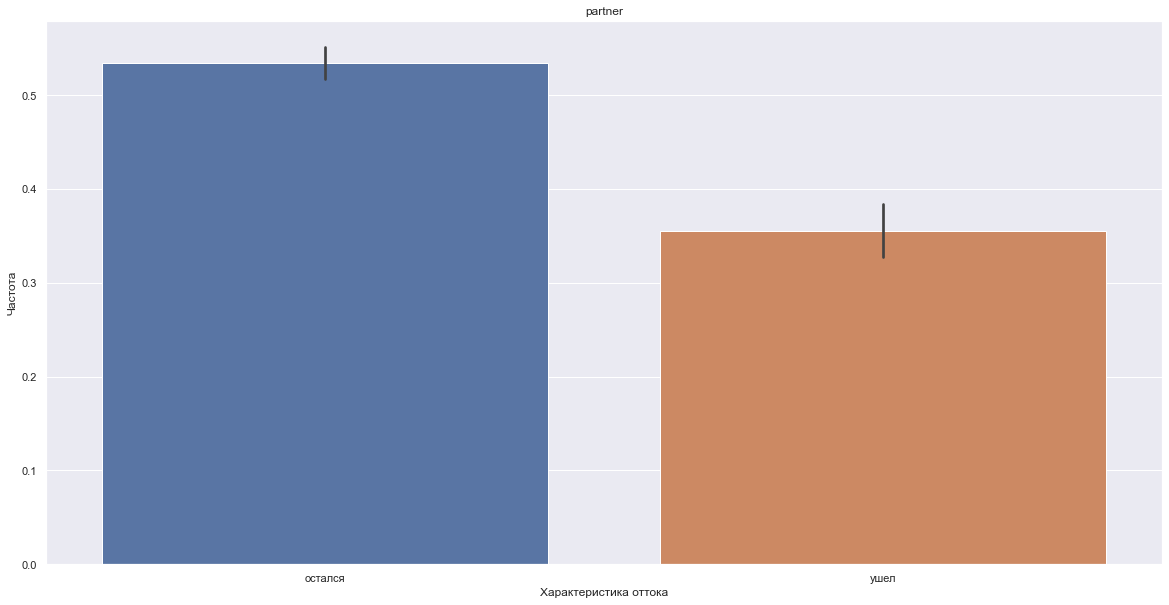

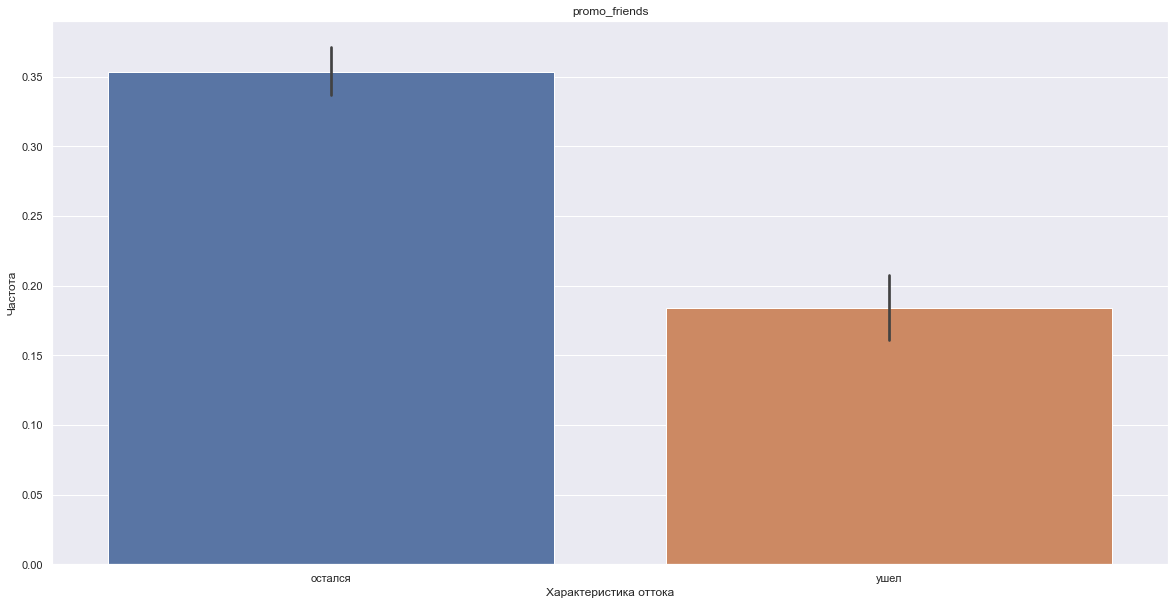

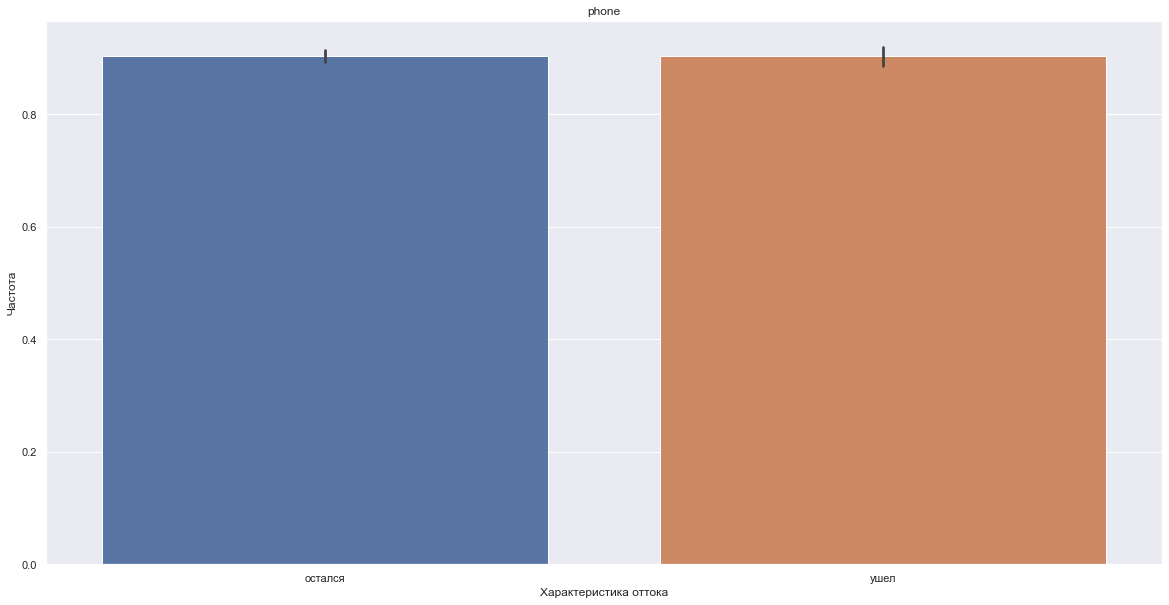

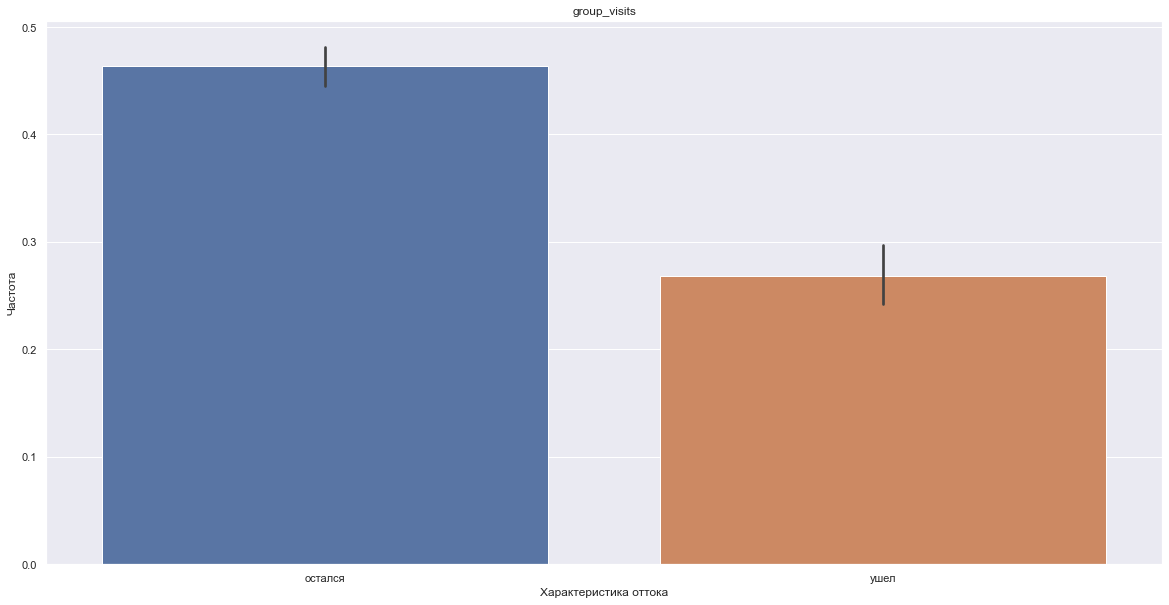

In [14]:
#Гистограммы для категориальных пременных
for i in list2:
    sns.barplot(data=df1, x='churn', y=i)
    plt.xlabel("Характеристика оттока")
    plt.ylabel("Частота")
    plt.title(i)
    plt.show()

Графики показывают, что чаще остаются клиенты, которые живут или работают неподалеку, приходящие по акции "приведи друга" и посещающие групповые занятия. От пола клиента отток не зависит, другими словами, мужчины и женщины одинаково часто бросают занятия фитнесом в этой сети клубов.

#### 2.4 Построим матрицу корреляций и отобразим её.

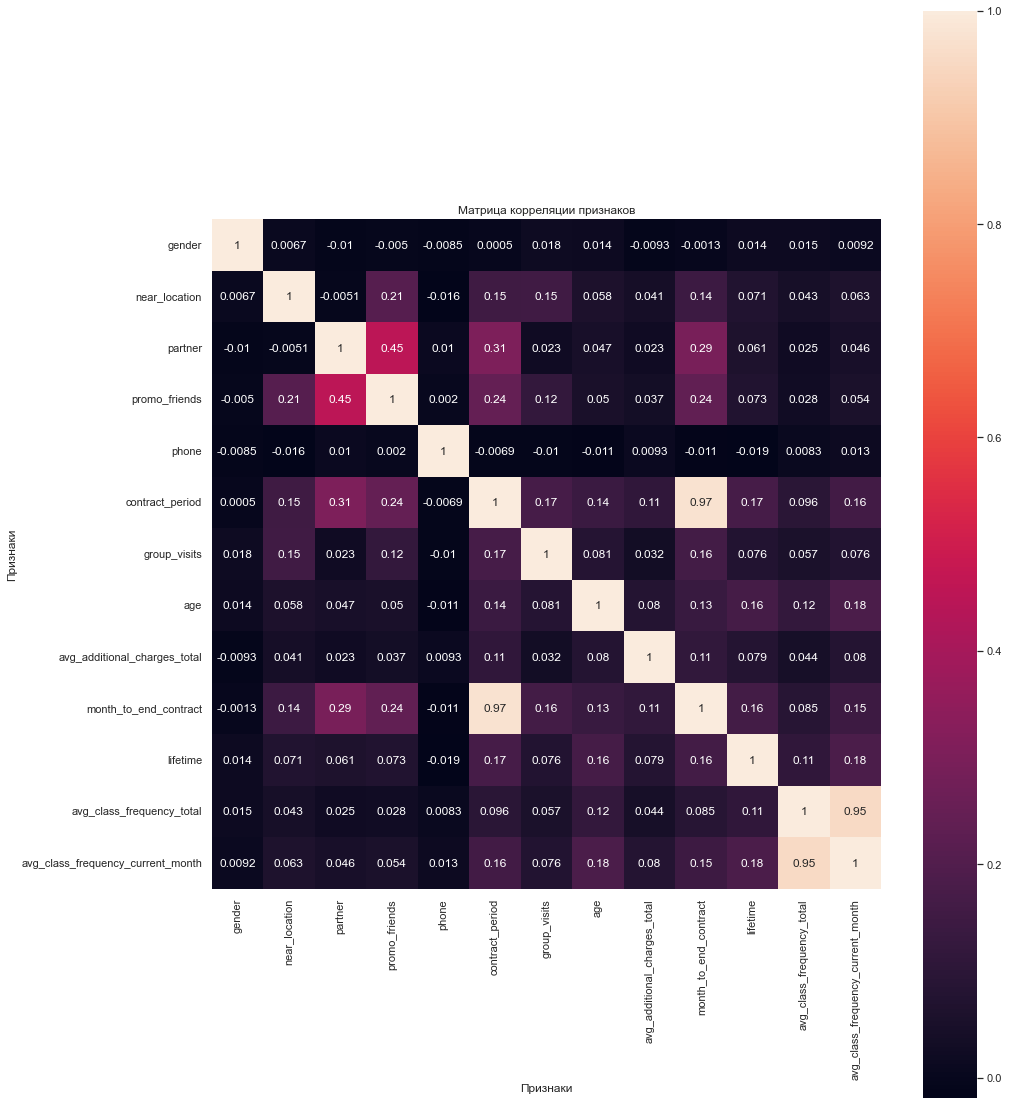

In [15]:
cm=df1.corr()
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляции признаков')
plt.xlabel("Признаки")
plt.ylabel("Признаки")
plt.show()

Матрица корреляций показывает сильную  корреляцию (0,95 и выше) в следующих парах: 
* 'contract_period' и 'month_to_end_contract'- чем больше период абонемента, тем скорее всего больше месяцев осталось;
* 'avg_class_frequency_current_month' и 'avg_class_frequency_total' - те кто давно посещает тренировки с постоянным графиком, тот и за последний месяц посещает тренировки с таким же графиком.

### Шаг 3. Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разбъем данные на обучающую и валидационную выборку функцией train_test_split().
* Обучим модель на train-выборке двумя способами:логистической регрессией,случайным лесом.
* Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели.

In [27]:
#Выделение данных
y = df['churn']
X = df.drop(['churn'], axis = 1)
#Деление данных на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Стандартизация выборок
scaler=StandardScaler()
X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.transform(X_test)
#Обучение моделей
model_lr = LogisticRegression(random_state=0)
model_rf=RandomForestClassifier(n_estimators=100, random_state=0)
model_lr.fit(X_train_st,y_train)
model_rf.fit(X_train_st,y_train)

RandomForestClassifier(random_state=0)

In [24]:
#Модель логистической регрессии
y_pred=model_lr.predict(X_test_st)
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test, y_pred)
print("Доля правильных ответов",accuracy)
print("Точность", precision)
print("Полнота", recall)

Доля правильных ответов 0.9225
Точность 0.8541666666666666
Полнота 0.8282828282828283


In [25]:
#Модель случайного леса
y_pred2=model_rf.predict(X_test_st)
accuracy2=accuracy_score(y_test, y_pred2)
precision2=precision_score(y_test,y_pred2)
recall2=recall_score(y_test, y_pred2)
print("Доля правильных ответов",accuracy2)
print("Точность", precision2)
print("Полнота", recall2)

Доля правильных ответов 0.915
Точность 0.8385416666666666
Полнота 0.8131313131313131


В результате сравнения двух моделей можно видеть, что доля правильных ответов(accuracy), точность(precision) и полнота(recall) выше в случае применения модели логистической регрессии, т.е. в данном случае модель логистической регрессии оказалась точнее.

### Шаг 4. Кластеризация клиентов

* Стандартизируем данные.
* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.
* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 
* Посмотрим на средние значения признаков для кластеров.
* Построим распределения признаков для кластеров.
* Для каждого полученного кластера посчитаем долю оттока.

In [32]:
df2=df
#Стандартизация данных
scaler=StandardScaler()
x_sc=scaler.fit_transform(df2)

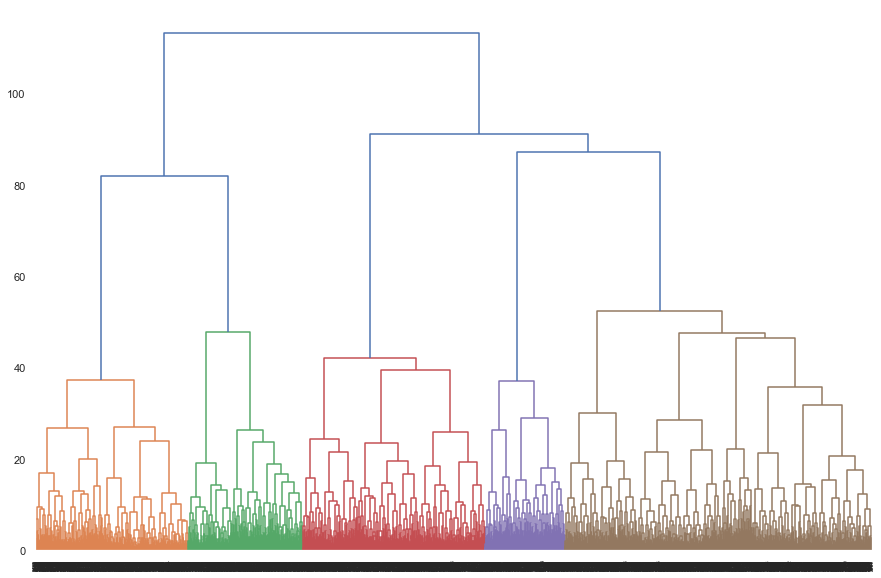

In [33]:
#Построение матрицы расстояний и дендрограммы
linked=linkage(x_sc, method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()

Так как цветов на дендрограмме 5, то и оптимальное число кластеров также равно 5.

In [34]:
#Задаем модель k_means с числом кластеров 5
km=KMeans(n_clusters=5)
#Прогнозируем кластеры для наблюдений
labels=km.fit_predict(x_sc)
#Сохраняем метки кластера в поле датасета
df2['cluster']=labels
#Вывод статистики по средним значениям признаков по кластеру
df2.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.51,0.95,0.76,0.55,0.90,11.38,0.56,29.89,163.63,10.44,4.70,2.00,2.00,0.02
1,0.47,1.00,0.43,0.29,0.90,2.82,0.42,30.00,151.55,2.62,4.78,1.18,1.17,0.00
2,0.51,1.00,0.33,0.22,0.90,1.61,0.29,26.95,114.16,1.56,0.97,1.48,1.05,1.00
3,0.55,0.95,0.37,0.26,0.91,2.86,0.47,30.12,162.47,2.62,4.77,2.97,2.97,0.00
4,0.50,0.00,0.47,0.07,0.91,2.16,0.21,28.42,132.10,2.04,2.67,1.60,1.40,0.47


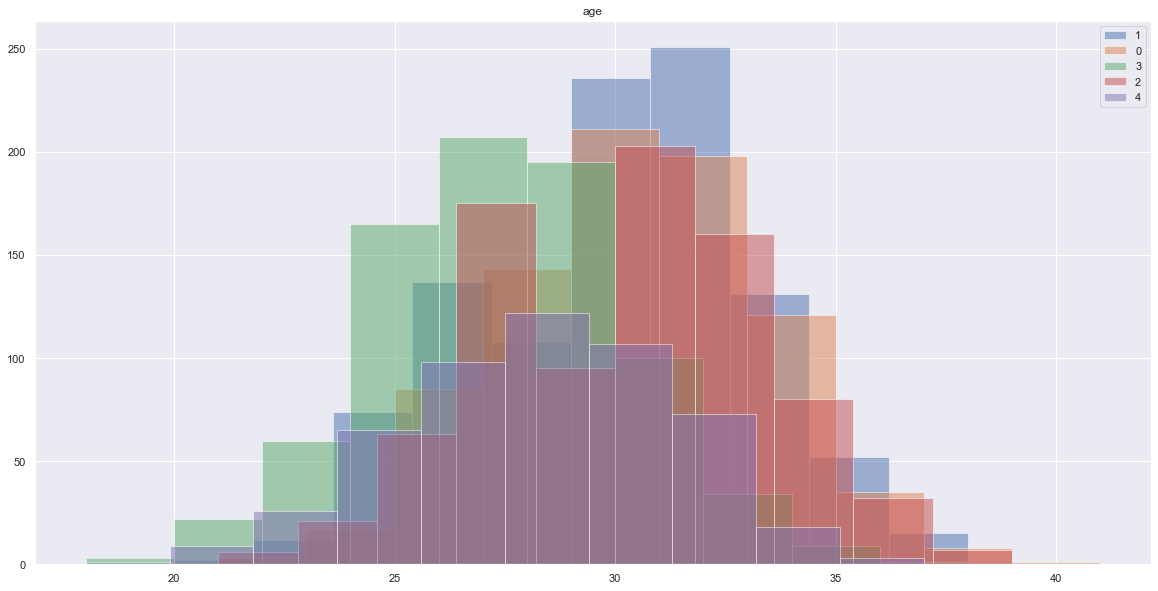

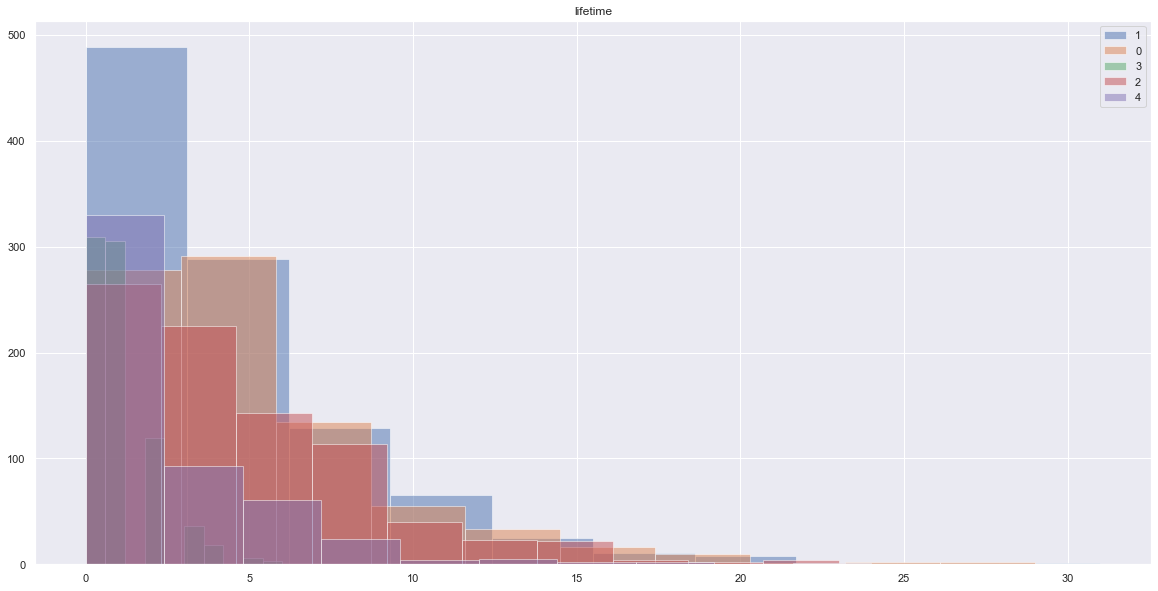

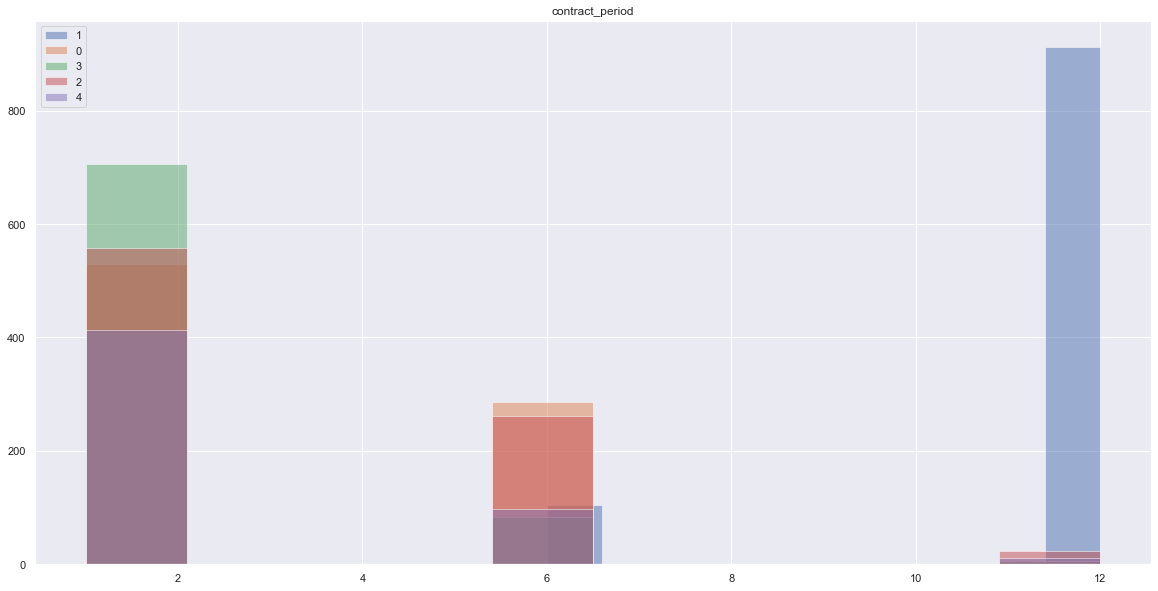

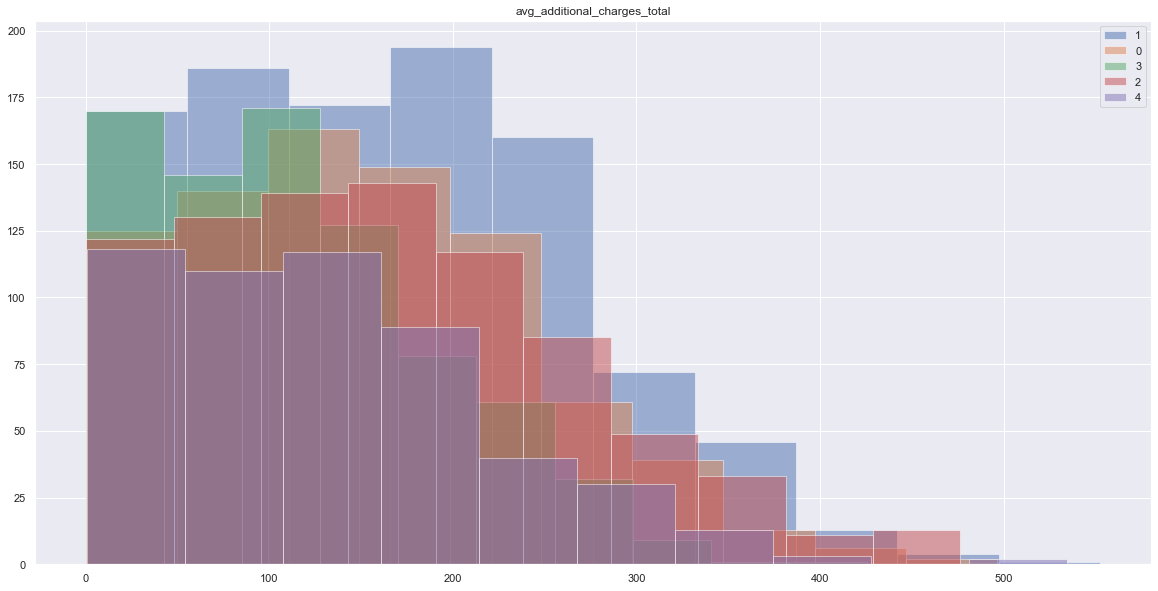

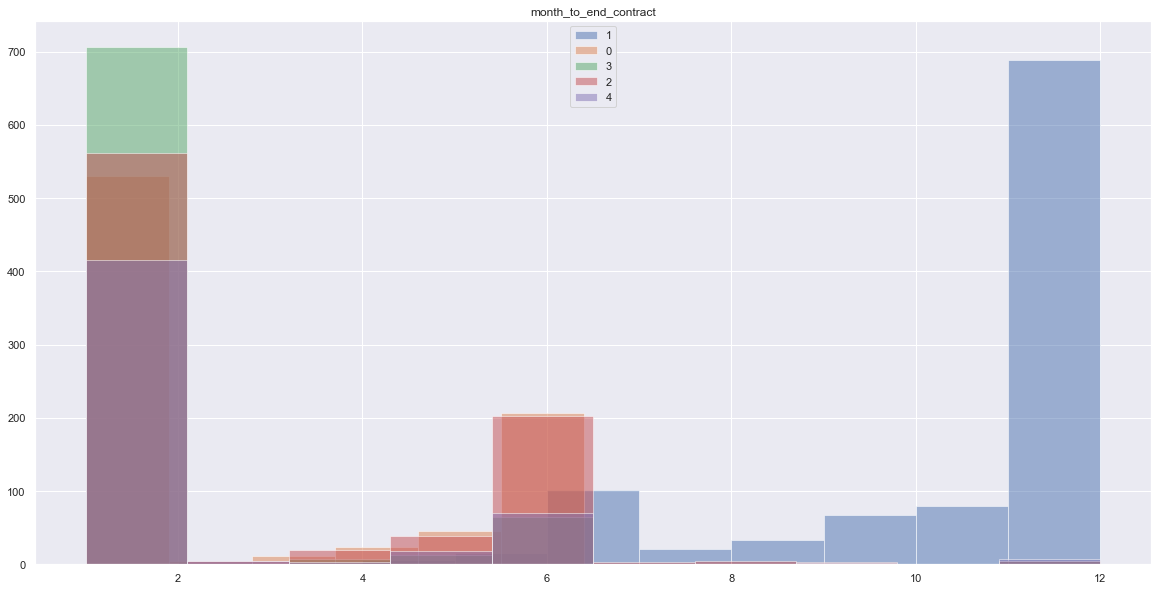

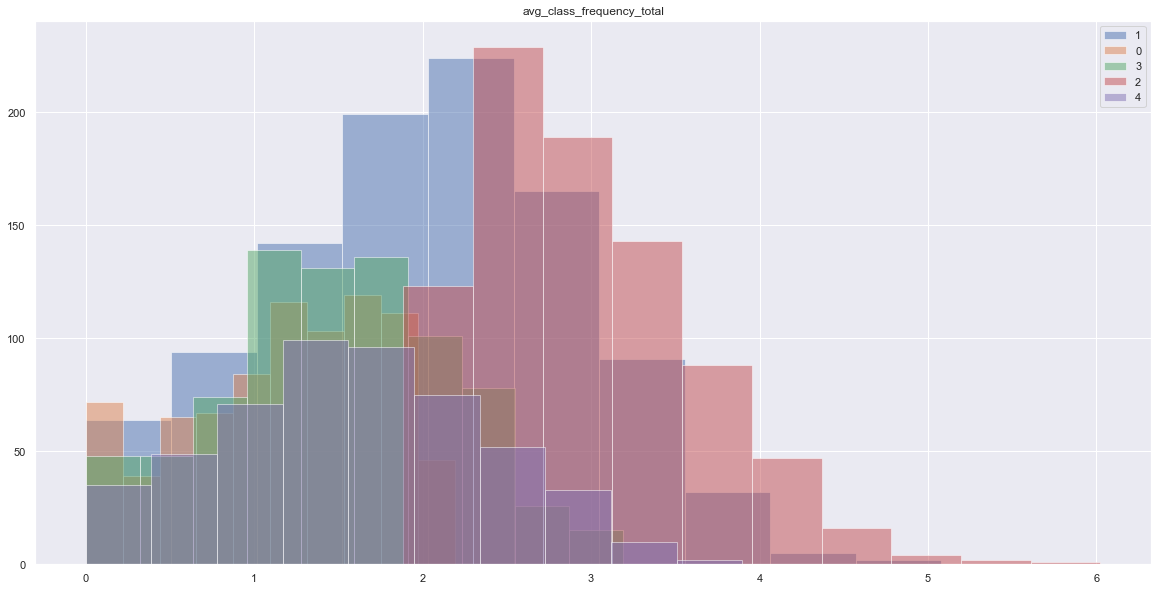

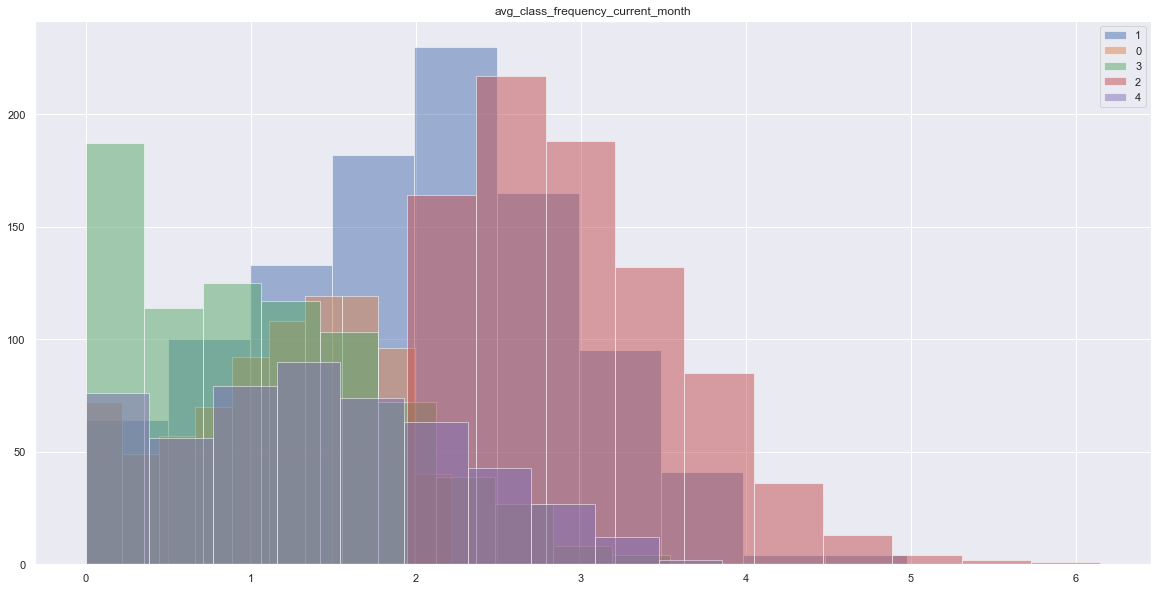

In [35]:
#Построим распределения признаков для кластеров (количественные переменные)
for i in list1:
    df2.groupby('cluster')[i].hist(alpha=0.5)
    plt.legend(df2['cluster'].unique())
    plt.title(i)
    plt.show()

Исходя из полученных гистограмм можно сформулировать характеристики кластеров: 
* Кластер 3 преимущественно состоит из тех кому 30 лет и меньше,а кластер 0 кому больше 30 лет. 
* Люди, остосящиеся к кластеру 1 чаще оформляли абонементы на 12 месяцев, а к кластеру 3,4 - на 1 месяц, к кластеру 2 - на 6 месяцев. 
* Среднее количество посещений занятий за всё время действия и абонементов для людей, относящихся к кластеру 0 - 1-2 раза в неделю, к кластеру 1 - 2-3 раза в неделю, к кластеру 2 - посещают занятия в среднем 2-3 раза в неделю, к кластеру 3 - 1-2 раз в неделю, а к кластеру 4 - 2 раза в неделю. 
* Среднее количество посещений занятий за последний месяц для людей, относящихся к кластеру 0 - 1-2 раз в неделю, к кластеру 1 - 2-3 раза в неделю, к кластеру 2 - более 2 раз в неделю, к кластеру 3 - до 2 раз в неделю, к кластеру 4 - 2 раз в неделю.
* 'lifetime' - по всем кластерам отток резко увеличиваетися после 5 месяца.

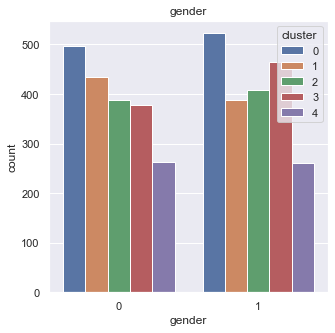

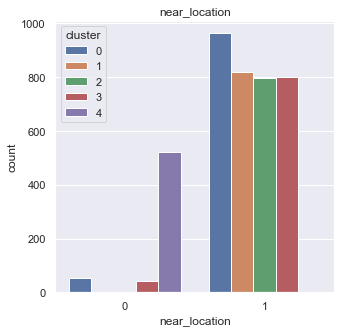

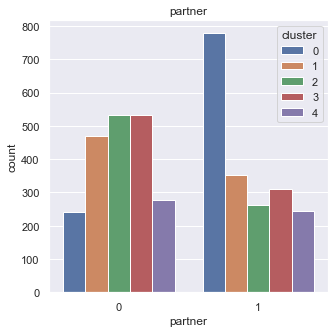

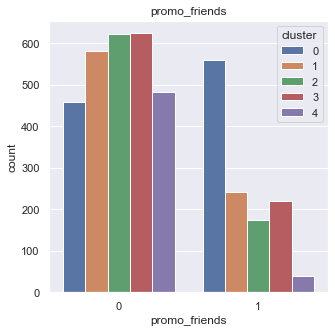

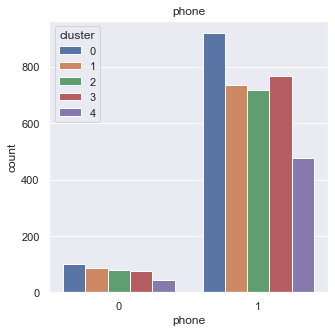

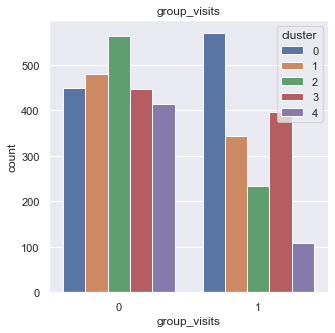

In [38]:
#Построим распределения признаков для кластеров (категоральные переменные)
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df2[column], hue='cluster', data=df2)
    plt.title(column)
    plt.show()

* Т.к. женщины в исходной таблице обозначены 1, а мужчины 0, то в кластере 0,2,3 больше женщин, а в кластере 1 - меньше женщин, в 4 кластере значения примерно одинаковы.
* Графики говорят, что наиболее близко к клубу живутили работают люди, принадлежащие к кластеру 0-4, а дальше - к кластеру 4;
* Больше всего сотрудников партеров клуба в кластере 0.
* Люди, принадлежащие к кластеру 0 чаще пользуются акцией "приведи друга",  к кластеру 4- реже остальных приходят по акции.
* По всем клаасам люди чаще оставляют телефон. 
* На групповые тренировки чаще ходят люди, принадлежащие к кластеру 0, реже всех остальных- к кластеру 4. 

In [80]:
df3 = df2.groupby('cluster').mean()
df3

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.51,0.95,0.76,0.55,0.90,11.38,0.56,29.89,163.63,10.44,4.70,2.00,2.00,0.02
1,0.47,1.00,0.43,0.29,0.90,2.82,0.42,30.00,151.55,2.62,4.78,1.18,1.17,0.00
2,0.51,1.00,0.33,0.22,0.90,1.61,0.29,26.95,114.16,1.56,0.97,1.48,1.05,1.00
3,0.55,0.95,0.37,0.26,0.91,2.86,0.47,30.12,162.47,2.62,4.77,2.97,2.97,0.00
4,0.50,0.00,0.47,0.07,0.91,2.16,0.21,28.42,132.10,2.04,2.67,1.60,1.40,0.47


Самая большая доля оттока во 2 и 4 кластере, в 0,1,3 - низкие доли оттока.

### Выводы

При построении моделей прогнозирования оттока клиентов были использованы модели "Логистическая регрессия" и "Случайный лес". 
Доля правильных ответов(accuracy), точность(precision) и полнота(recall) выше в случае применения модели логистической регрессии.

В результате анализа было принято решение разбить всех клиентов на 5 кластеров, в результате чего было выявлено, что наибольшая оттока во 2(близка к 100%) и 4(47%) кластере, в 0,1,3 - низкие доли оттока (0-2%).

Рекомендации:
* Завлекать клиентов, предлагая партнерские программы и промо-акции.
* Завлекать клиентов, предлагая более выгодные цены на абонементы на 12 месяцев.
* Предлагать участвовать в групповых занятиях.
* Создавать условия, чтобы клиенты ходили чаще 2-3 раз в неделю.

Целевая аудитория :
* Те кто живет или работает близко
* Уделить внимание людям возрастом 30+ лет.
